# California 🔥🌶️

The Red Hot Chili Peppers' obsession with California is no secret. But just how often does *California* appear in their discography?

### Getting the Lyrics

Before we start counting, we'll need to get the lyrics from all of their songs. Using a basic web scraper built with `httpx` and `beautifulsoup4`, I extracted 13 albums worth of songs from https://geniuslyrics.net. (this isn't the same website as the [Genius](https://genius.com/) that you might be more familiar with...)

### Counting the Words

With the lyrics extracted, we can then run through each song's `txt` file and count how many times `"California"` shows up:

In [441]:
import os
from lyrics import to_filename


def count_californias():
    occurrences = 0

    # get all the folders in this directory
    absolute_path = os.getcwd()
    album_names = [file for file in os.listdir() if file[0].isdigit()]
    for album_name in album_names:
        album_path = f"{absolute_path}/{album_name}"

        # get all the txt files in the album's directory
        song_names = os.listdir(album_path)
        for song_name in song_names:
            song_path = f"{album_path}/{song_name}"

            with open(song_path, "r", encoding="utf-8") as f:
                for line in f.readlines():
                    line = line.lower()
                    occurrences += line.count("california")

    return occurrences


# number of times california appears in the RHCP discography
print(f"California Counter: {count_californias()}")


California Counter: 22


### *That's it?*

It's honestly kind of disappointing that the word `"California"` only appears **22** times. So let's expand the list of words we're looking for:

In [442]:
california_words = ["california", "californication", "l.a.",
                    "city of angels", "venice", "hollywood",
                    "san francisco", "golden gate", "west end"]


def count_words(words):
    word_counts = {}

    absolute_path = os.getcwd()
    album_names = [file for file in os.listdir() if file[0].isdigit()]
    for album_name in album_names:
        album_path = f"{absolute_path}/{album_name}"

        # removes number at the front
        album_name = album_name[3:]

        song_names = os.listdir(album_path)
        for song_name in song_names:
            song_path = f"{album_path}/{song_name}"

            with open(song_path, "r", encoding="utf-8") as f:
                for line in f.readlines():
                    line = line.lower()

                    # check how often the words appear
                    for word in words:
                        word_counts[album_name] = word_counts.get(
                            album_name, 0) + line.count(word)

    return word_counts


# number of california-related words/phrases
counts = count_words(california_words)
californias = sum((count for count in counts.values()))

for album, count in counts.items():
    print(f"{album}: {count}")

print(f"\nCalifornia Counter: {californias}")


the_red_hot_chili_peppers: 16
freaky_styley: 4
the_uplift_mofo_party_plan: 14
mothers_milk: 3
blood_sugar_sex_magik: 1
one_hot_minute: 6
californication: 30
by_the_way: 6
stadium_arcadium: 9
im_with_you: 3
the_getaway: 3
unlimited_love: 6
return_of_the_dream_canteen: 1
others: 0

California Counter: 102


Ok, this looks a bit more within expectations, but for a band with 13 albums and countless songs, this is still a gross underestimate. I don't know a lot about California so I'm definitely missing quite a few references. Let's check their most common words instead:

In [443]:
import pandas as pd


def word_frequency():
    word_counts = {}
    absolute_path = os.getcwd()
    album_names = [file for file in os.listdir() if file[0].isdigit()]
    for album_name in album_names:
        album_path = f"{absolute_path}/{album_name}"

        song_names = os.listdir(album_path)
        for song_name in song_names:
            song_path = f"{album_path}/{song_name}"

            with open(song_path, "r", encoding="utf-8") as f:
                for line in f.readlines():
                    for word in line.lower().split():
                        word_counts[word] = word_counts.get(word, 0) + 1

    return word_counts


frequencies = pd.DataFrame(data=word_frequency().items(),
                           columns=["word", "count"])
frequencies = frequencies.sort_values(by=["count"], ascending=False)
frequencies = frequencies.reset_index(drop=True)
frequencies.head(10)


,word,count
0,the,2727
1,i,2138
2,a,1698
3,and,1627
4,to,1596
5,you,1542
6,my,1067
7,me,914
8,of,894
9,it,832


In [444]:
frequencies.loc[frequencies["word"] == "california"]


,word,count
374,california,22


In [445]:
total_words = frequencies["count"].sum()
print(f"California Percentage: {round(22 / total_words * 100, 10)}%")


California Percentage: 0.0340115021%


Alright, so `"California"` is the 374th most common word in RHCP songs. What are we going to do with this information?

### Plotting the Graphs

Let's plot some graphs based on these word frequencies.

It's hard to gauge album quality or success, but we can approximate that with album sales and Spotify streaming stats from [RHCP Recording Session Archive](https://www.rhcpsessions.com/album-sales-figures).

Just for fun, I'll also track whether John Frusciante was involved in the album.

In [446]:
albums = pd.read_csv("statistics.csv")
albums["album"] = albums["album"].apply(to_filename)
albums["californias"] = albums["album"].map(counts)
albums


,album,year,sales,streams,length,frusciante,californias
0,the_red_hot_chili_peppers,1984-08-10,630000,33882636,31:54,False,16
1,freaky_styley,1985-08-16,890000,27778958,39:50,False,4
2,the_uplift_mofo_party_plan,1987-09-29,1080000,41244216,38:19,False,14
3,mothers_milk,1989-08-16,2630000,203836897,44:52,True,3
4,blood_sugar_sex_magik,1991-09-24,14430000,1715866645,73:42,True,1
5,one_hot_minute,1995-09-12,5850000,228369395,61:14,False,6
6,californication,1999-06-08,16270000,2976311136,56:24,True,30
7,by_the_way,2002-07-09,9450000,1840629332,68:27,True,6
8,stadium_arcadium,2006-05-09,7130000,2215202866,122:19,True,9
9,im_with_you,2011-08-26,2230000,400806157,59:15,False,3


First, let's look at the distribution of `"California"`s among the albums:

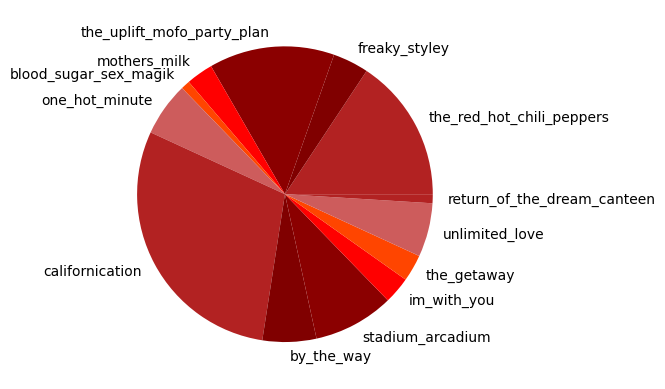

In [447]:
import matplotlib.pyplot as plt

colors = ("firebrick", "maroon", "darkred", "red", "orangered", "indianred")

plt.pie(albums["californias"], labels=albums["album"], colors=colors)
plt.show()


It's probably not a surprise that the album named *Californication* contains the most references to California.

Next, let's see how many `"California"`s there with respect to time:

In [448]:
def convert_to_seconds(t):
    mm, ss = t.split(":")
    return int(mm) * 60 + int(ss)


albums["length"] = albums["length"].apply(convert_to_seconds)

# Californias per second: CPS
albums["cps"] = albums["californias"] / albums["length"]


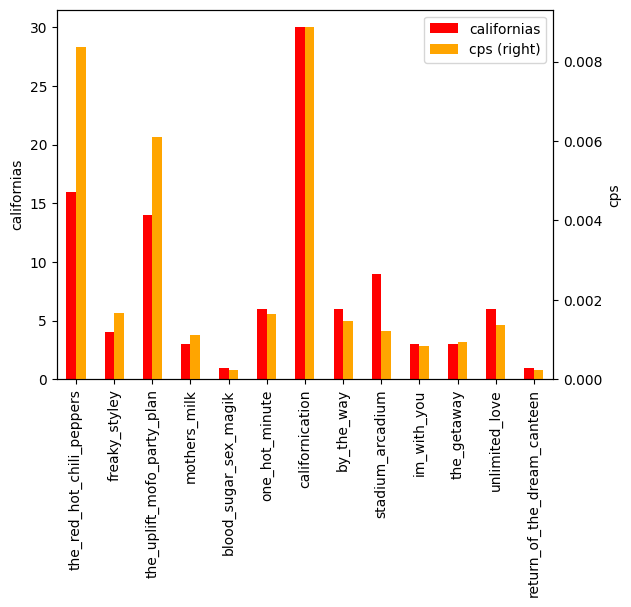

In [449]:
albums[["album", "californias", "cps"]].plot(
    kind="bar", secondary_y="cps", color=("red", "orange"))
ax1, ax2 = plt.gcf().get_axes()
ax1.set_xticklabels(albums["album"])
ax1.set_ylabel("californias")
ax2.set_ylabel("cps")

plt.show()


In [450]:
overall_cps = 102 / albums["length"].sum()
interval = 1 / overall_cps
print(f"1 California per {round(interval, 2)} seconds")


1 California per 469.44 seconds


You can expect to hear a California refernce every 469 seconds, or every roughly 7.8 minutes.

Now let's see if the number of references to California is related to the quality of the album:

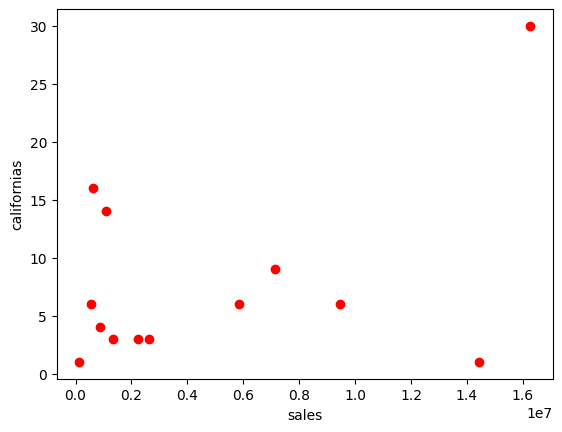

In [451]:
ax = plt.axes()
ax.set_xlabel("sales")
ax.set_ylabel("californias")
plt.scatter(albums["sales"], albums["californias"], color="red")

plt.show()

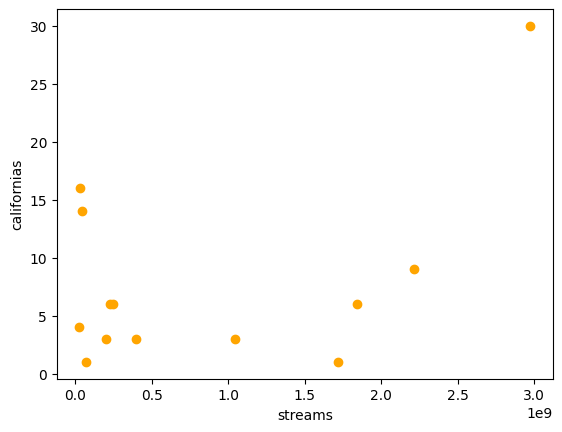

In [452]:
ax = plt.axes()
ax.set_xlabel("streams")
ax.set_ylabel("californias")
plt.scatter(albums["streams"], albums["californias"], color="orange")

plt.show()

Uhh... But is John Frusciante related to these references? 🎸

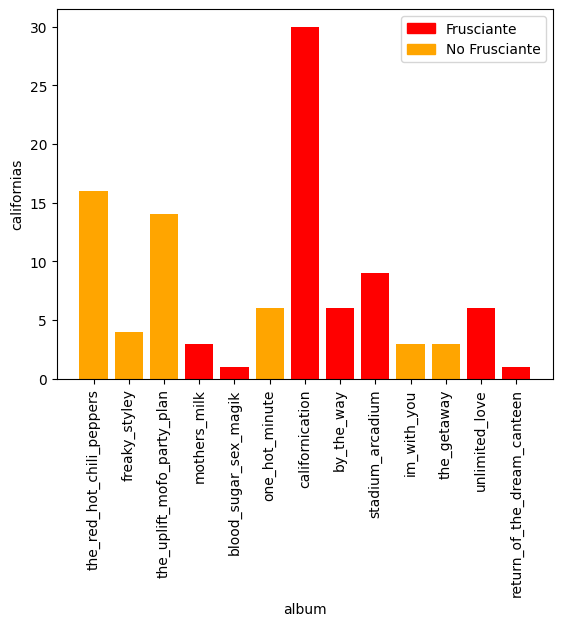

In [453]:
import matplotlib.patches as mpatches

colors = ["red" if frusciante else "orange" for frusciante in albums["frusciante"] ]

ax = plt.axes()
ax.set_xlabel("album")
ax.set_ylabel("californias")

plt.bar(albums["album"], albums["californias"], color=colors)
plt.xticks(rotation=90)

red_patch = mpatches.Patch(color="red", label="Frusciante")
orange_patch = mpatches.Patch(color="orange", label="No Frusciante")
ax.legend(handles=[red_patch, orange_patch])

plt.show()

### Conclusion?

Well, I guess the Red Hot Chili Peppers don't actually reference California that much. Now I know that `"California"` is only mentioned by name 22 times. :-(

By the way, [this guy](https://www.reddit.com/r/RedHotChiliPeppers/comments/nv59p0/hopefully_every_referrence_to_california_in/) has done a much better job than me, since he has a more comprehensive list of California-related phrases.